In [0]:
#Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install geopandas

In [0]:
#check that drive is mounted properly
!ls /content/gdrive/'My Drive' | grep 'data'

data.csv
data.gsheet
gnvcrimedata (1).gsheet
gnvcrimedata.gsheet


In [0]:
import pandas as pd

crimeData = pd.read_csv('/content/gdrive/My Drive/Crime_Incidents.xls')
crimeData = crimeData.drop(columns=[':@computed_region_9cfm_spy5', ':@computed_region_43jd_v64e', ':@computed_region_ndi2_bfht'])
crimeData.head()

FileNotFoundError: ignored

In [0]:
ct = pd.read_csv('/content/gdrive/My Drive/Crime_Incidents - Crime_Incidents.csv', header=None)
ct = ct.drop(columns=[3,4,5,6])
ct = ct[ct[2] != 'DROP']
ct

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,6,12,15,16,17,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,ID,Incident Type,Report Date,Offense Day of Week,City,State,Address,Latitude,Zip Code Boundaries,Longitude,Location,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,:@computed_region_9cfm_spy5,:@computed_region_43jd_v64e,:@computed_region_ndi2_bfht
1,219015073,NaN,9/17/2019 9:02,Tuesday,GAINESVILLE,FL,500 BLK NW 8TH AVE,29.659.423,1,-82.329.994,POINT (-82.329994 29.659423),1,1,1,772,2,14,1
2,219015126,property,9/17/2019 7:24,Wednesday,GAINESVILLE,FL,1000 BLK SE 12TH ST,29.643.188,9,-82.310.184,POINT (-82.310184 29.643188),5,1,1,"1,082",NaN,18,1
3,219015352,property,9/17/2019 12:05,Wednesday,GAINESVILLE,FL,4000 BLK NW 30TH PL,29.680.912,6,-82.384.569,POINT (-82.384569 29.680912),8,3,5,769,NaN,6,5
4,219015384,theft grand,9/17/2019 7:47,Monday,GAINESVILLE,FL,4000 BLK SW 30TH PL,29.625.653,2,-82.383.886,POINT (-82.383886 29.625653),32,3,12,767,NaN,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150812,617003583,property,5/23/2017 0:00,Friday,GAINESVILLE,FL,2800 BLK SW 13TH ST,29.625.328,2,-8.233.943,POINT (-82.33943 29.625328),15,4,3,767,NaN,16,3
150813,219003110,theft grand,2/22/2019 9:19,Thursday,GAINESVILLE,FL,1200 BLK W UNIVERSITY AVE,29.652.073,1,-823.371,POINT (-82.3371 29.652073),1,1,1,772,2,14,1
150814,218015861,Suspicious Incident,8/29/2018 17:38,Wednesday,GAINESVILLE,FL,2500 BLK NE 11TH PL,29.663.146,9,-82.292.001,POINT (-82.292001 29.663146),14,1,2,"1,082",2,12,2
150815,219010828,property,7/2/2019 14:23,Monday,GAINESVILLE,FL,1500 BLK NW 25TH TER,29.665.788,5,-82.361.062,POINT (-82.361062 29.665788),16,3,6,770,NaN,5,6


# Visualizations:

[Text(0, 0.5, 'Incident Count'),
 Text(0.5, 0, 'Hour of Day'),
 Text(0.5, 1.0, 'Gainesville Incident Count by Hour of Day')]

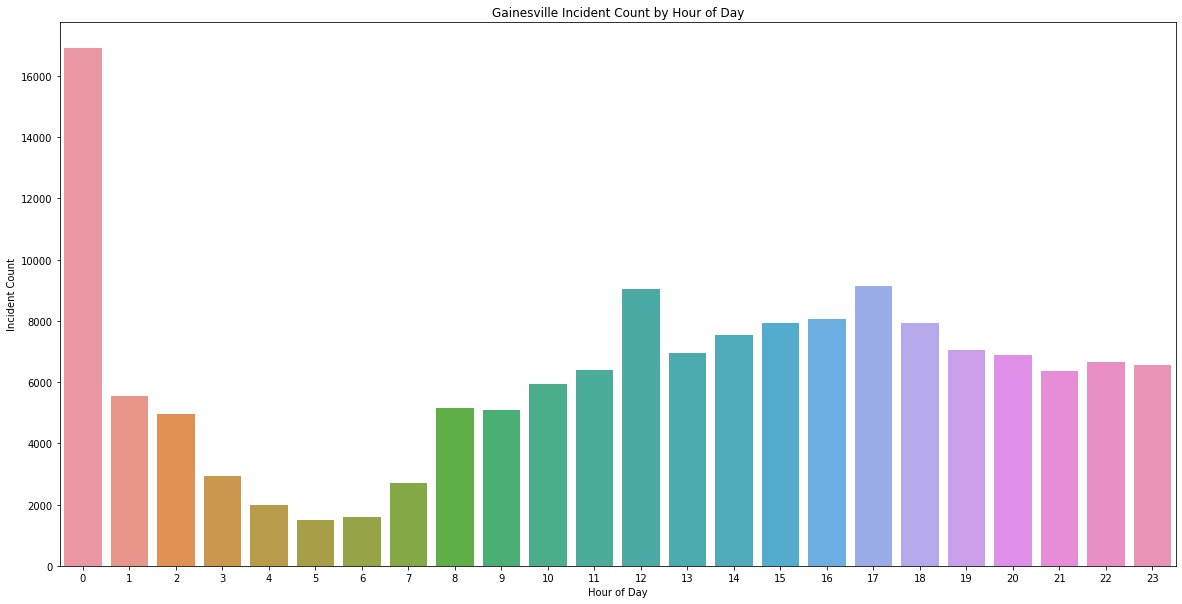

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
#num incidents per hour
numIncidentsPerHour = crimeData.groupby('Offense Hour of Day', as_index=False).count()
plt.figure(figsize=(20,10))
sns.barplot(x=numIncidentsPerHour['Offense Hour of Day'], y=numIncidentsPerHour['ID']).set(xlabel='Hour of Day', ylabel='Incident Count', title='Gainesville Incident Count by Hour of Day')

[Text(0, 0.5, 'Incident Count'),
 Text(0.5, 1.0, 'Gainesville Incident Count by Time Interval')]

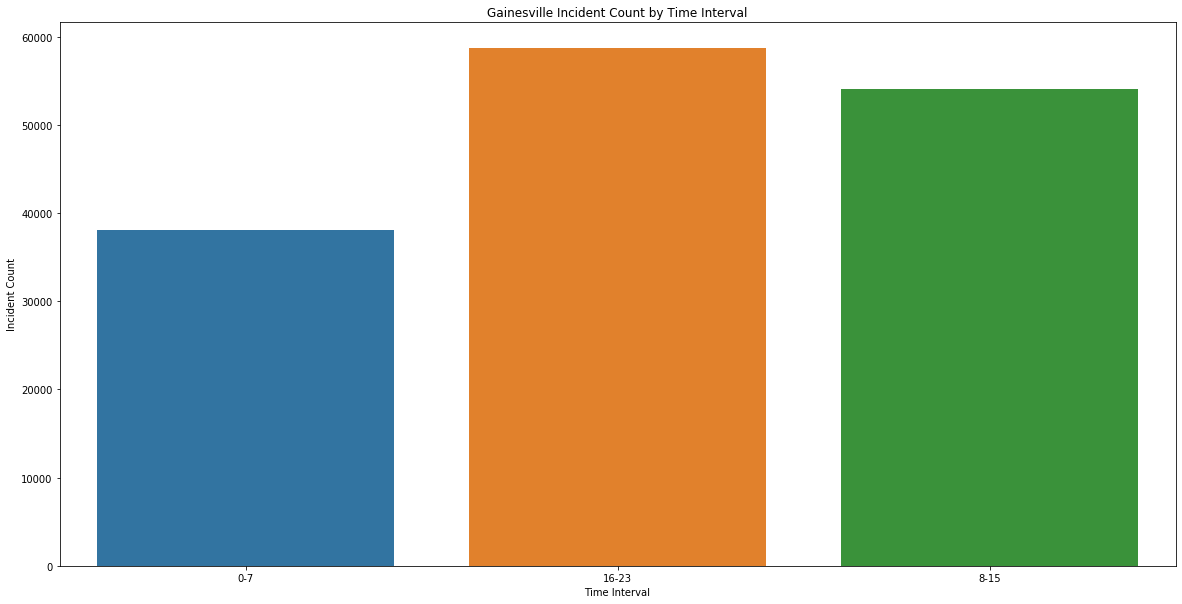

In [0]:
#Incidents by time interval of 8 hrs
def discTime(hr):
  if hr >= 0 and hr <= 7:
    return '0-7'
  if hr >= 8 and hr <= 15:
    return '8-15'
  if hr >= 16 and hr <= 23:
    return '16-23'

crimeData['Time Interval'] = crimeData.apply(lambda row: discTime(row['Offense Hour of Day']), axis=1)

incPerPeriod = crimeData.groupby('Time Interval', as_index=False).count()
plt.figure(figsize=(20,10))
sns.barplot(x=incPerPeriod['Time Interval'], y=incPerPeriod['ID']).set(ylabel='Incident Count', title='Gainesville Incident Count by Time Interval')

[Text(0, 0.5, 'Incident Count'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Gainesville Incident Count by Weekday')]

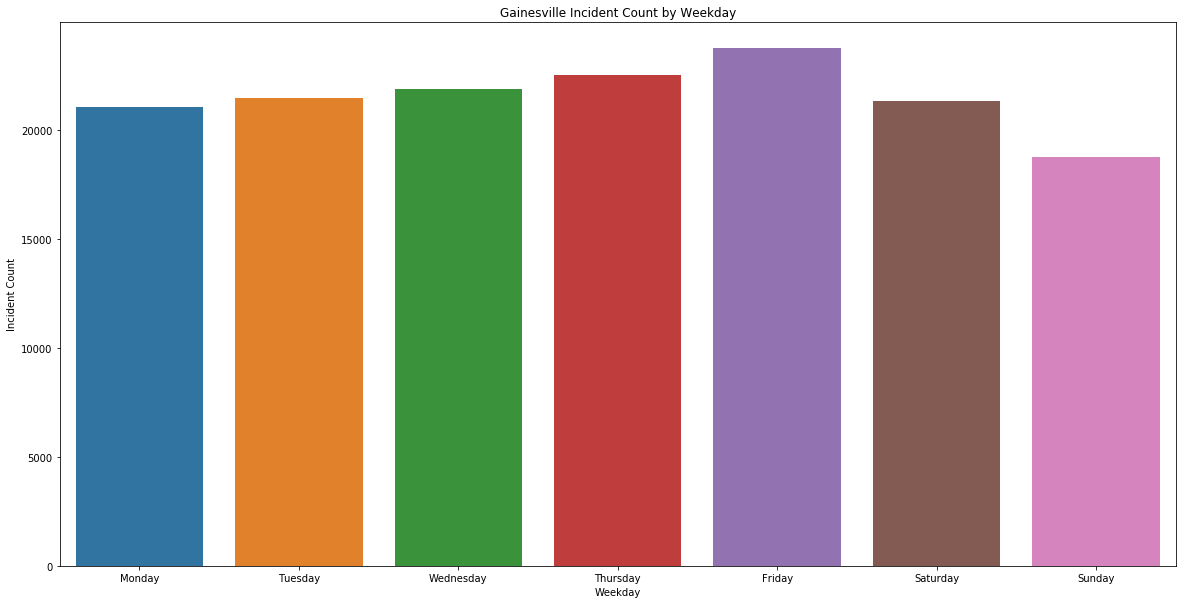

In [0]:
#Incident count by weekday
incPerDay = crimeData.groupby('Offense Day of Week', as_index=True).count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
incPerDay['index'] = incPerDay.index
plt.figure(figsize=(20,10))
sns.barplot(x=incPerDay['index'], y=incPerDay['ID']).set(xlabel='Weekday', ylabel='Incident Count', title='Gainesville Incident Count by Weekday')

In [0]:
def f(x):
  if(x == 'animal' or x=='false report' or x=='computer' or x =='arson' or x=='bomb' or x =='sexual' or x=='kidnapping'):
    return 'other'
  return x

#Incidents per category
cat = pd.read_csv('/content/gdrive/My Drive/data.csv')
incPerCat = cat.groupby('Crime', as_index=False)['Crime'].agg(['count'])
incPerCat['cat'] = incPerCat.index
incPerCat = incPerCat[incPerCat['count'] >= 25]
incPerCat = incPerCat.sort_values(by=['count'], ascending=False)
plt.figure(figsize=(70,10))
sns.barplot(x=incPerCat['cat'], y=incPerCat['count']).set(xlabel='Incident Category', ylabel='Incident Count', title='Gainesville Incident Count per Incident Type')

ValueError: ignored

[Text(0, 0.5, 'Incident Count'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Gainesville Incident Count by Year')]

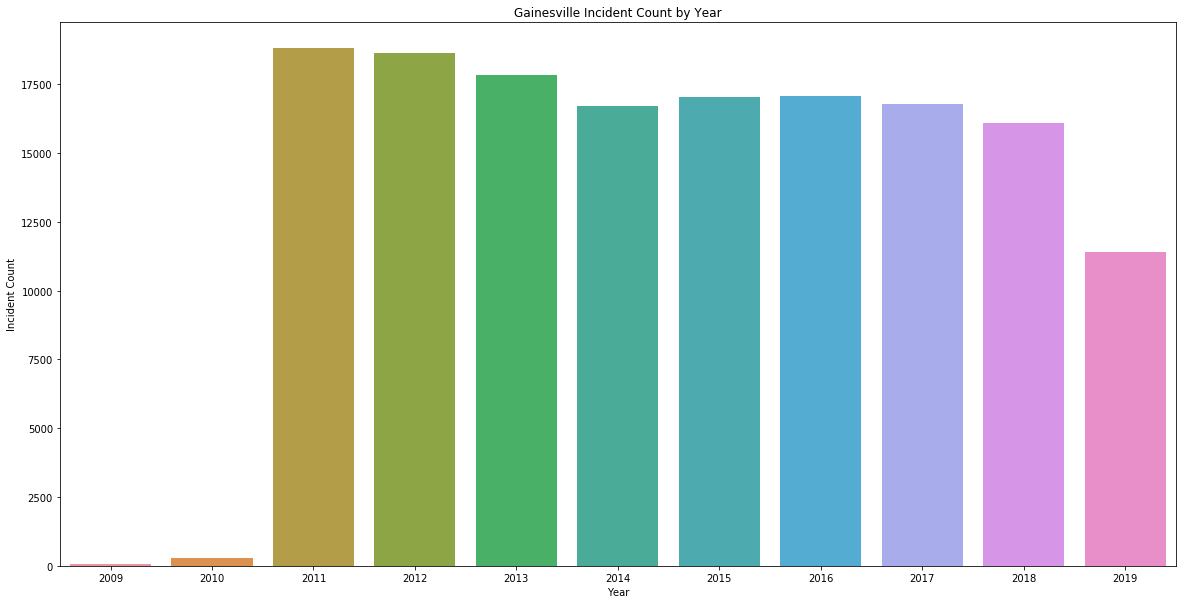

In [0]:
#Incident count by year
incPerYear = crimeData
incPerYear['Year'] = incPerYear.apply(lambda row: pd.to_datetime(row['Offense Date']).year, axis=1)
incPerYear = incPerYear.groupby('Year', as_index=False).count()
incPerYear = incPerYear[incPerYear['Year'] > 2008]
plt.figure(figsize=(20,10))
sns.barplot(x=incPerYear['Year'], y=incPerYear['ID']).set(xlabel='Year', ylabel='Incident Count', title='Gainesville Incident Count by Year')

[Text(0, 0.5, 'Incident Count'),
 Text(0.5, 0, 'Police District'),
 Text(0.5, 1.0, 'Gainesville Incident Count by Police District')]

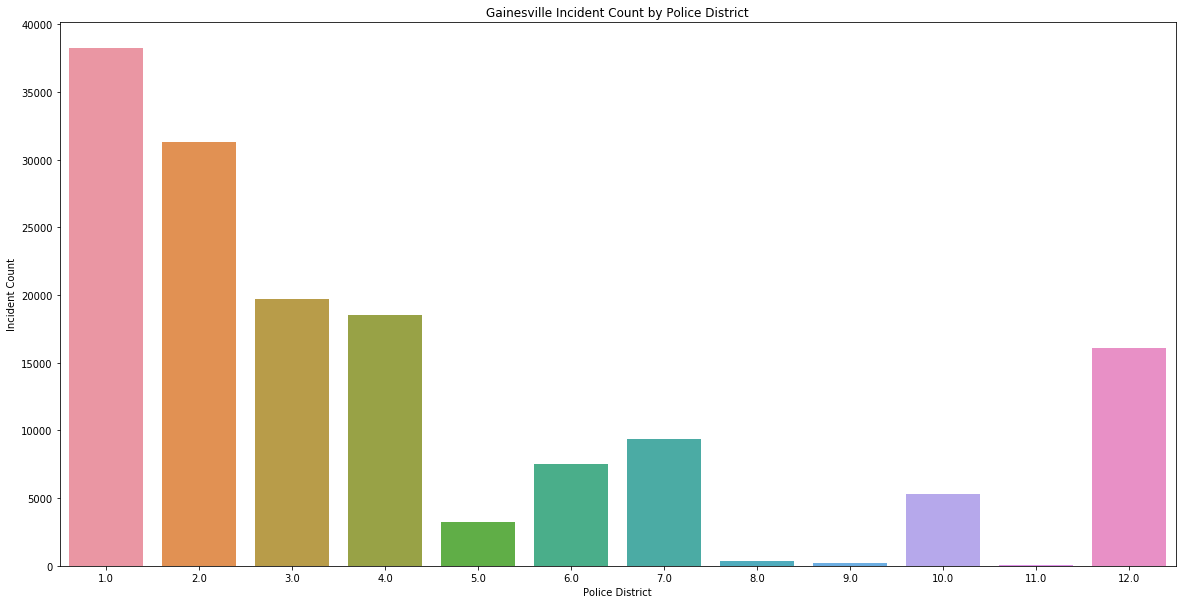

In [0]:
#Incident count by district
incPerDist = crimeData.groupby('Gainesville Police Districts', as_index=False).count()

plt.figure(figsize=(20,10))
sns.barplot(x=incPerDist['Gainesville Police Districts'], y=incPerDist['ID']).set(xlabel='Police District', ylabel='Incident Count', title='Gainesville Incident Count by Police District')

# Classification:

In [0]:
#Hourly count by Indcident Type
chart = crimeData.groupby([''])

In [0]:
!pip install eli5

In [0]:
!pip install pdpbox

In [0]:
!pip install shap

In [0]:
import pandas as pd
from shapely.geometry import  Point
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import os
import re
#import geoplot as gplt
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import shap

In [0]:
! SHAPE_RESTORE_SHX=YES fio info '/content/gdrive/My Drive/cgbound.shp'

{"driver": "ESRI Shapefile", "schema": {"properties": {}, "geometry": "LineString"}, "crs": "", "crs_wkt": "", "bounds": [2628433.290525512, 223703.03658134377, 2691777.5318645057, 289243.02269038267], "name": "cgbound", "count": 7}


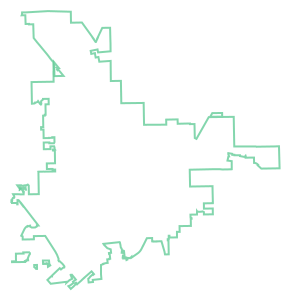

In [0]:
gainesville = gpd.read_file('/content/gdrive/My Drive/cgbound.shp')
gainesville.crs={'init': 'epsg:4326'}
gville = gainesville.unary_union
gville

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing

crimeData = pd.read_csv('/content/gdrive/My Drive/data.csv')

def discTime(hr):
  if hr == '0-7':
    return 1
  #if hr == '8 - 15':
  if hr == '16-23':
    return 3
  else:
   return 2

crimeData['Time'] = crimeData.apply(lambda row: discTime(row['Time']), axis=1)
crimeData

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,District,Time,Day,Crime
0,3,2,Sunday,animal
1,1,2,Tuesday,animal
2,2,1,Monday,animal
3,1,2,Saturday,animal
4,3,3,Wednesday,animal
...,...,...,...,...
134625,2,2,Friday,weapon
134626,2,2,Wednesday,weapon
134627,12,1,Thursday,weapon
134628,7,2,Tuesday,weapon


In [0]:
le = preprocessing.LabelEncoder()
crimeData['Crime'] = le.fit_transform(crimeData['Crime'].astype(str))
crimeData['Crime'] = le.fit_transform(crimeData['Crime'])

le2 = preprocessing.LabelEncoder()
crimeData['Day'] = le.fit_transform(crimeData['Day'].astype(str))
crimeData['Day'] = le.fit_transform(crimeData['Day'])

In [0]:
y = crimeData['Crime']
crimeData = crimeData.drop(columns= 'Crime')
X_train, X_test, y_train, y_test = train_test_split(crimeData, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(107704, 3) (107704,)
(26926, 3) (26926,)


In [0]:
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

ValueError: ignored